In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 4)

In [36]:
def rate_distortion_func(var, D):
    return 0.5 * np.log(var / D)

def k_mean_mse_func(X, C):
    R = {i: [] for i in range(len(C))}
    mse = 0
    for i, x in enumerate(X):
        x_ind = np.argmin([(x - c) ** 2 for c in C])
        R[x_ind].append(x)
    
    for i in range(len(C)):
        if len(R[i]) == 0:
            R[i] = np.random.choice(X, size=1)
        C[i] = np.mean(R[i])
        mse += np.sum(np.power(np.array(R[i]) - C[i], 2))

        R[i] = []
    mse /= M
    return C, mse

In [21]:
M = 1000
X = np.random.normal(size=M)

/tmp/ipykernel_204/4016773155.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.5 * np.log(var / D)


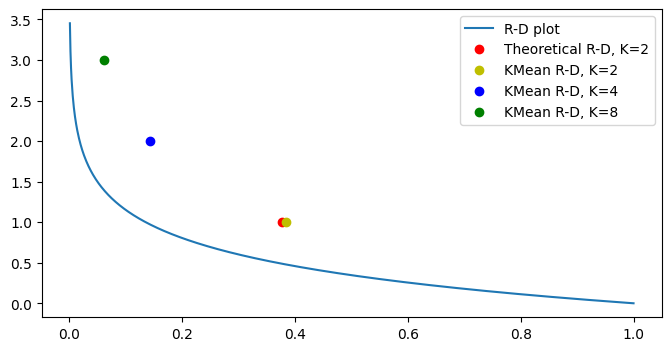

In [43]:
var = 1
D = np.linspace(0, 1, 1000)
R = [rate_distortion_func(var, d) for d in D]

plt.plot(D, R, label="R-D plot")

C_K2 = [-np.sqrt(2 / np.pi), np.sqrt(2 / np.pi)]
_, D_k2 = k_mean_mse_func(X, C_K2)
R_k2 = 1
plt.plot(D_k2, R_k2, "ro", label="Theoretical R-D, K=2")

colors = ["yo", "bo", "go"]
for i, K in enumerate([2, 4, 8]):
    mse = None
    C = np.random.choice(X, size=K, replace=False)
    while True:
        C, cur_mse = k_mean_mse_func(X, C)
        if mse is not None and np.abs(cur_mse - mse) <= 1e-2:
            break
        mse = cur_mse
    R_ki = np.log2(K)
    plt.plot(mse, R_ki, colors[i], label=f"KMean R-D, K={K}")

plt.legend(loc='upper right')
plt.show()